In [ ]:
Lab work №2

Student name - Khrystyna

Student surname - Zyryanova

Group - CS-32

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 11

print("--- Завантаження та підготовка Star Dataset ---")

# 1. Завантаження та Розділення Даних
try:
    file_path = 'archive/Star3642_balanced.csv' 
    data = pd.read_csv(file_path)
    print(f"Дані успішно завантажено з: {file_path}. Розмір: {data.shape}")
    
    features = ['Vmag', 'Plx', 'e_Plx', 'B-V', 'Amag'] 
    
    X_full = data[features]
    y_full = data['TargetClass']

    y_encoded = y_full.values
    class_names = ['Class 0', 'Class 1']
    print(f"Класи: {class_names} закодовані як {np.unique(y_encoded)}")
    
except Exception as e:
    print(f"\nКритична помилка: {e}. Перевірте ще раз шлях до файлу та назви стовпців.")
    raise

# Розділення даних
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_encoded, test_size=0.3, random_state=RANDOM_SEED, stratify=y_encoded
)

# 2. Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nМасштабування даних завершено.")
print("-" * 50)

--- Завантаження та підготовка Star Dataset ---
Дані успішно завантажено з: archive/Star3642_balanced.csv. Розмір: (3642, 7)
Класи: ['Class 0', 'Class 1'] закодовані як [0 1]

Масштабування даних завершено.
--------------------------------------------------


In [32]:
# 3. Навчання та Тюнінг Моделей
all_results = {} # Словник для зберігання результатів точності (accuracy)
RANDOM_SEED = 11

# 1. LogisticRegression Tuning
print("\n--- 1. LogisticRegression Tuning (Лінійна модель) ---")
for i, C_val in enumerate([0.1, 1.0, 10.0]):
    model = LogisticRegression(C=C_val, solver='liblinear', random_state=RANDOM_SEED, multi_class='ovr', max_iter=1000)
    model.fit(X_train_scaled, y_train) # Навчання на масштабованих тренувальних даних
    
    print(f"\nКонфігурація LR: C={C_val}")
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    all_results[f'LR_C{C_val}'] = acc
    # show_classification_report виводить метрики (Accuracy, Precision, Recall, F1)
    show_classification_report(X_test_scaled, y_test, model, title=f"LR Performance (C={C_val})")


# 2. SVC Tuning (RBF Kernel)
print("\n--- 2. SVC Tuning (Нелінійна модель) ---")
svc_configs = [(1.0, 'scale'), (10.0, 'scale'), (1.0, 0.01)]
for i, (C_val, gamma_val) in enumerate(svc_configs):
    model = SVC(kernel='rbf', C=C_val, gamma=gamma_val, random_state=RANDOM_SEED)
    model.fit(X_train_scaled, y_train)
    
    print(f"\nКонфігурація SVC: C={C_val}, Gamma={gamma_val}")
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    all_results[f'SVC_C{C_val}_G{gamma_val}'] = acc
    show_classification_report(X_test_scaled, y_test, model, title=f"SVC Performance (C={C_val}, Gamma={gamma_val})")

# 3. RandomForestClassifier Tuning
print("\n--- 3. RandomForestClassifier Tuning (Ансамбль) ---")
rf_configs = [(50, 10), (200, 10), (100, None)]
for i, (n_est, max_d) in enumerate(rf_configs):
    model = RandomForestClassifier(n_estimators=n_est, max_depth=max_d, random_state=RANDOM_SEED, n_jobs=-1)
    model.fit(X_train_scaled, y_train) 
    
    print(f"\nКонфігурація RF: n_est={n_est}, d={max_d}")
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    all_results[f'RF_N{n_est}_D{max_d}'] = acc
    show_classification_report(X_test_scaled, y_test, model, title=f"RF Performance (n_est={n_est}, d={max_d})")

print("-" * 50)
print("\n Тюнінг моделей завершено. Порівняння результатів:")
best_model_name = max(all_results, key=all_results.get)
print(f"Найкраща точність ({all_results[best_model_name]:.4f}) належить конфігурації: {best_model_name}")


--- 1. LogisticRegression Tuning (Лінійна модель) ---

Конфігурація LR: C=0.1

Конфігурація LR: C=1.0

Конфігурація LR: C=10.0

--- 2. SVC Tuning (Нелінійна модель) ---

Конфігурація SVC: C=1.0, Gamma=scale

Конфігурація SVC: C=10.0, Gamma=scale


c:\Users\Кристина\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Кристина\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Кристина\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Конфігурація SVC: C=1.0, Gamma=0.01

--- 3. RandomForestClassifier Tuning (Ансамбль) ---

Конфігурація RF: n_est=50, d=10

Конфігурація RF: n_est=200, d=10

Конфігурація RF: n_est=100, d=None
--------------------------------------------------

 Тюнінг моделей завершено. Порівняння результатів:
Найкраща точність (0.9103) належить конфігурації: SVC_C1.0_G0.01



--- Візуалізація PCA ---
Пояснена дисперсія першими двома компонентами: 0.6234
Модель SVC_C1.0_G0.01 навчена на 2D-компонентах PCA.


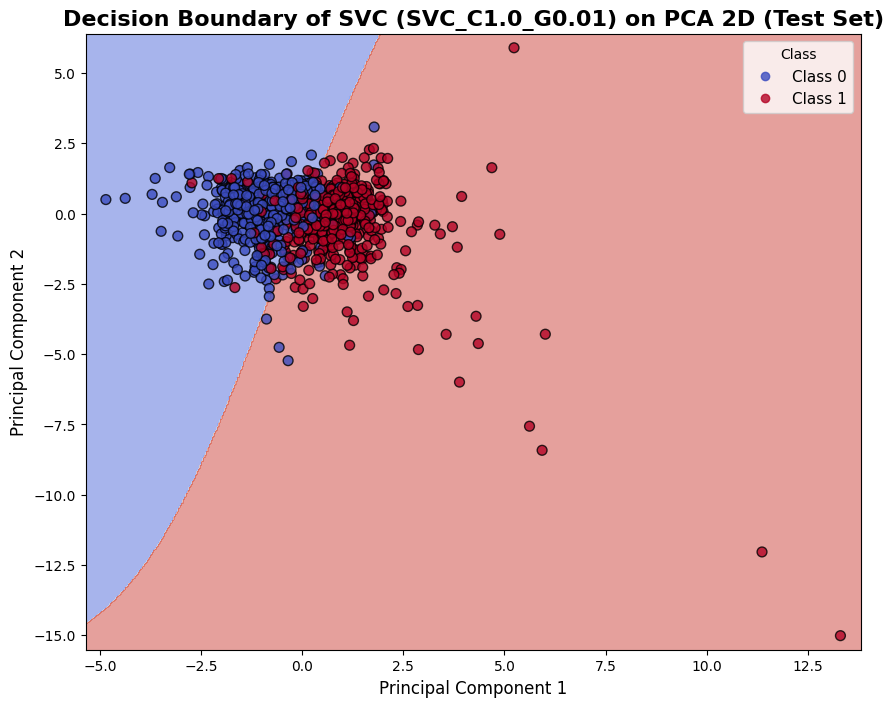

In [33]:
# 4 та 5: PCA та Візуалізація меж рішень

RANDOM_SEED = 11

# 1. Застосування PCA для зменшення розмірності до 2D
pca = PCA(n_components=2, random_state=RANDOM_SEED)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("\n--- Візуалізація PCA ---")
print(f"Пояснена дисперсія першими двома компонентами: {pca.explained_variance_ratio_.sum():.4f}")

# 2. Вибір та Навчання Найкращої Моделі на 2D-Даних
# Найкраща модель: SVC (C=1.0, Gamma=0.01)
best_model_name = "SVC_C1.0_G0.01"
best_svc_model = SVC(kernel='rbf', C=1.0, gamma=0.01, random_state=RANDOM_SEED)

# Навчаємо найкращу конфігурацію на даних, зменшених до 2D
best_svc_model.fit(X_train_pca, y_train)

print(f"Модель {best_model_name} навчена на 2D-компонентах PCA.")

# 3. Візуалізація даних та межі рішень у просторі PCA
def plot_pca_boundary(X_pca, y_true, model, class_names):
    """Візуалізує дані, проектовані на простір PCA, та межу рішень моделі."""
    plt.style.use('seaborn-v0_8-pastel')
    fig, ax = plt.subplots(figsize=(10, 8))

    # Створення сітки для фону
    x1_min, x1_max = X_pca[:, 0].min() - 0.5, X_pca[:, 0].max() + 0.5
    x2_min, x2_max = X_pca[:, 1].min() - 0.5, X_pca[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                           np.linspace(x2_min, x2_max, 500))
    
    grid_points = np.c_[xx1.ravel(), xx2.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx1.shape)
    
    cmap_background = plt.cm.coolwarm
    ax.contourf(xx1, xx2, Z, cmap=cmap_background, alpha=0.5)

    # Візуалізація точок даних
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap=cmap_background, 
                         edgecolors='k', marker='o', s=50, alpha=0.8)

    ax.set_title(f'Decision Boundary of {type(model).__name__} ({best_model_name}) on PCA 2D (Test Set)', fontsize=16, weight='bold')
    ax.set_xlabel('Principal Component 1', fontsize=12)
    ax.set_ylabel('Principal Component 2', fontsize=12)

    # Створення легенди
    class_names_list = ['Class 0', 'Class 1']
    handles, _ = scatter.legend_elements()
    ax.legend(handles=handles, labels=class_names_list, loc='upper right', title="Class", fontsize=11)
    
    plt.show()

# Запускаємо фінальну візуалізацію
plot_pca_boundary(X_test_pca, y_test, best_svc_model, class_names)